In [1]:
# Import thư viện cần thiết
import folium
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
import requests
import geopandas
import geopandas as gpd
import requests
from folium.plugins import TimeSliderChoropleth
from branca.element import Figure

In [2]:
# Đọc dữ liệu covid từ URL
df_covid = pd.read_csv("complete.csv")

# In ra 5 dòng đầu tiên của dữ liệu để kiểm tra
df_covid.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


In [3]:
# Đọc dữ liệu từ file geojson
india_geojson = gpd.read_file("india.json")

# In ra 5 dòng đầu tiên của dữ liệu để kiểm tra
india_geojson.head()

,id,district,dt_code,st_nm,st_code,year,geometry
0,None,Aizawl,261,Mizoram,15,2011_c,"POLYGON ((93.04466 23.41052, 92.94680 23.51363..."
1,None,Champhai,262,Mizoram,15,2011_c,"MULTIPOLYGON (((93.04619 23.66623, 93.04466 23..."
2,None,Kolasib,263,Mizoram,15,2011_c,"POLYGON ((92.89633 24.39072, 92.86116 24.31374..."
3,None,Lawngtlai,264,Mizoram,15,2011_c,"POLYGON ((92.93456 22.55405, 92.93150 22.39458..."
4,None,Lunglei,265,Mizoram,15,2011_c,"POLYGON ((92.67307 23.38303, 92.68989 23.32804..."


<Axes: >

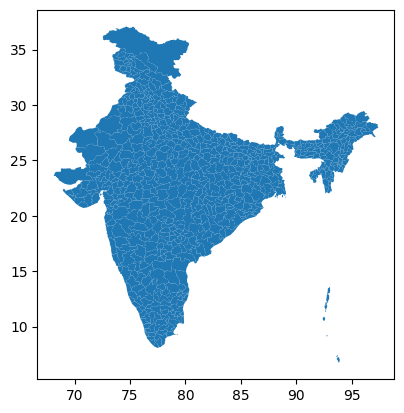

In [4]:
# Trực quan dữ liệu geojson
india_geojson.plot()



In [5]:
# Xử lý dữ liệu 4-1
df_covid.isnull().sum()


Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64

In [6]:
# Xử lý dữ liệu 4-2
df_covid.dtypes

Date                          object
Name of State / UT            object
Latitude                     float64
Longitude                    float64
Total Confirmed cases        float64
Death                         object
Cured/Discharged/Migrated    float64
New cases                      int64
New deaths                     int64
New recovered                  int64
dtype: object

In [7]:
# Lấy danh sách các giá trị duy nhất trong cột 'Name of State / UT'
unique_states = df_covid['Name of State / UT'].unique()

# Xử lý dữ liệu trong cột 'Name of State / UT'
df_covid['Name of State / UT'] = df_covid['Name of State / UT'].apply(lambda x: re.sub(r'[^a-zA-Z ]', '', x))
df_covid['Name of State / UT'].replace('Telengana', 'Telangana')
df_covid['Name of State / UT'].replace('Dadar Nagar Haveli', 'Dadra and Nagar Haveli')

# Kiểm tra lại danh sách các giá trị duy nhất sau khi xử lý
print(df_covid['Name of State / UT'].unique())


['Kerala' 'Delhi' 'Telengana' 'Haryana' 'Rajasthan' 'Uttar Pradesh'
 'Tamil Nadu' 'Union Territory of Ladakh' 'Karnataka' 'Maharashtra'
 'Punjab' 'Union Territory of Jammu and Kashmir' 'Andhra Pradesh'
 'Uttarakhand' 'Odisha' 'Puducherry' 'West Bengal' 'Chhattisgarh'
 'Union Territory of Chandigarh' 'Gujarat' 'Chandigarh' 'Himachal Pradesh'
 'Jammu and Kashmir' 'Ladakh' 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura' 'Meghalaya'
 'Dadra and Nagar Haveli and Daman and Diu' 'Sikkim' 'Nagaland'
 'Telangana']


In [8]:
id_dict = {'Andaman and Nicobar Islands': '0',
    'Arunachal Pradesh': '1',
    'Assam': '2',
    'Bihar': '3',
    'Chandigarh': '4',
    'Chhattisgarh': '5',
    'Dadra and Nagar Haveli': '6',
    'Daman and Diu': '7',
    'Goa': '8',
    'Gujarat': '9',
    'Haryana': '10',
    'Himachal Pradesh': '11',
    'Jharkhand': '12',
    'Karnataka': '13',
    'Kerala': '14',
    'Laksadweep': '15',
    'Madhya Pradesh': '16',
    'Maharashtra': '17',
    'Manipur': '18',
    'Meghalaya': '19',
    'Mizoram': '20',
    'Nagaland': '21',
    'Delhi': '22',
    'Puducherry': '23',
    'Punjab': '24',
    'Rajasthan': '25',
    'Sikkim': '26',
    'Tamil Nadu': '27',
    'Telangana': '28',
    'Tripura': '29',
    'Uttar Pradesh': '30',
    'Uttarakhand': '31',
    'West Bengal': '32',
    'Odisha': '33',
    'Andhra Pradesh': '34',
    'Jammu and Kashmir': '35',
    'Ladakh': '36',
}
df_covid['state_id'] = df_covid['Name of State / UT'].map(id_dict)

In [9]:
# Chuyển đổi kiểu dữ liệu của cột 'Death' sang số
df_covid['Death'] = pd.to_numeric(df_covid['Death'], errors='coerce')

# Sửa lại dữ liệu trong cột 'Death'
# Ví dụ, nếu bạn muốn thay đổi giá trị 'NaN' thành 0:
df_covid['Death'].fillna(0)

# Tính toán số ca nhiễm còn tồn tại
df_covid['Active Cases'] = df_covid['Total Confirmed cases'] - df_covid['Death'] - df_covid['Cured/Discharged/Migrated']
df_covid.head()


,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,state_id,Active Cases
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0.0,0.0,0,0,0,14,1.0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0.0,0.0,0,0,0,14,1.0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0.0,0.0,1,0,0,14,2.0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0.0,0.0,1,0,0,14,3.0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0.0,0.0,0,0,0,14,3.0


In [10]:
# Xử lý dữ liệu 4 -6
bins=np.linspace(min(df_covid['Active Cases']), max(df_covid['Active Cases']), 11)
bins

array([     0. ,  15096.6,  30193.2,  45289.8,  60386.4,  75483. ,
        90579.6, 105676.2, 120772.8, 135869.4, 150966. ])

In [11]:
df_covid['color']=pd.cut(df_covid['Active Cases'], bins, labels=['#FFEBEB', '#F8D2D4', '#F2B9BE', '#EBA1A8', '#E58892', '#DE707C', '#D75866', '#D04050', '#C8283A', '#C01024'])
df_covid['color'].replace(np.nan, '#32CD32')

0       #FFEBEB
1       #FFEBEB
2       #FFEBEB
3       #FFEBEB
4       #FFEBEB
         ...   
4687    #F8D2D4
4688    #FFEBEB
4689    #F2B9BE
4690    #FFEBEB
4691    #F8D2D4
Name: color, Length: 4692, dtype: category
Categories (10, object): ['#FFEBEB' < '#F8D2D4' < '#F2B9BE' < '#EBA1A8' ... '#D75866' < '#D04050' < '#C8283A' < '#C01024']

In [12]:
# Xử lý dữ liệu 4 -7
df_covid=df_covid[['Date','state_id', 'color']]
df_covid.head()

,Date,state_id,color
0,2020-01-30,14,#FFEBEB
1,2020-01-31,14,#FFEBEB
2,2020-02-01,14,#FFEBEB
3,2020-02-02,14,#FFEBEB
4,2020-02-03,14,#FFEBEB


In [13]:
# Xử lý dữ liệu 4 -8
for date in df_covid['Date'].unique():
    dif=set([str(i) for i in range(37)])-set(df_covid[df_covid['Date']==date]['state_id'])
    for i in dif:
        df_covid=pd.concat([df_covid,pd.DataFrame([[date,i,'#0073CF']], columns=['Date','state_id','color'])], ignore_index=True)
df_covid.sort_values(by=['Date'], inplace=True)

In [14]:
# Chuyển đổi cột 'Date' sang định dạng thời gian
df_covid['Date'] = pd.to_datetime(df_covid['Date'])

# Chuyển đổi định dạng thời gian thành chuỗi có độ dài mong muốn
df_covid['Date'] = df_covid['Date'].dt.strftime('%Y-%m-%d')

# Khởi tạo covid_dict
covid_dict = {}

# Lặp qua từng state_id và thêm thông tin vào covid_dict
for i in df_covid['state_id'].unique():
    covid_dict[i] = {}
    for j in df_covid[df_covid['state_id'] == i].values:
        covid_dict[i][j[0]] = {'color': j[1], 'opacity': 0.8}
        



In [15]:
# Xử lý dữ liệu 4 - 10  
india_geojson['state_id'] = india_geojson['st_nm'].map(id_dict)
india_geojson.drop(columns=['st_nm'], inplace=True)
india_geojson.head()


,id,district,dt_code,st_code,year,geometry,state_id
0,None,Aizawl,261,15,2011_c,"POLYGON ((93.04466 23.41052, 92.94680 23.51363...",20
1,None,Champhai,262,15,2011_c,"MULTIPOLYGON (((93.04619 23.66623, 93.04466 23...",20
2,None,Kolasib,263,15,2011_c,"POLYGON ((92.89633 24.39072, 92.86116 24.31374...",20
3,None,Lawngtlai,264,15,2011_c,"POLYGON ((92.93456 22.55405, 92.93150 22.39458...",20
4,None,Lunglei,265,15,2011_c,"POLYGON ((92.67307 23.38303, 92.68989 23.32804...",20


In [16]:
# Convert 'state_id' to string in india_geojson
india_geojson['state_id'] = india_geojson['state_id'].astype(str)

# Convert keys in covid_dict to string
covid_dict = {str(key): val for key, val in covid_dict.items()}

# Convert 'color' values in covid_dict to string
for state_id in covid_dict:
    for date in covid_dict[state_id]:
        covid_dict[state_id][date]['color'] = str(covid_dict[state_id][date]['color'])


In [17]:
# Tạo figure và bản đồ folium
m6 = folium.Map(location=[24, 84], tiles='cartodbpositron', zoom_start=5)

# Thiết lập CRS cho dữ liệu geojson
india_geojson = geopandas.read_file("india.json")
india_geojson.crs = "EPSG:4326"

# Thêm TimeSliderChoropleth vào bản đồ
g = TimeSliderChoropleth(
    data=india_geojson.to_json(),
    styledict=covid_dict
).add_to(m6)

# Hiển thị bản đồ
m6
